<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/PSD_histogram_ANN_r_squared_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [75]:
!pip install mahotas

In [76]:
import mahotas.features.texture as mht
import mahotas.features

In [77]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020


In [78]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 165.33 MiB | 31.73 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado


In [79]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [80]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.72 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [81]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [82]:
df=Segmenta(img)
Img_Size = 28

In [83]:
print(df)

    Width           0           1  ...         781         782         783
0     144  147.479172  159.875778  ...  155.709106  168.168213  179.915115
1     147  103.637192  116.712029  ...  146.040817  137.784592  116.936508
2     127    1.895840    0.998202  ...  115.197350  133.523468  142.215027
3     171  178.753815  179.852539  ...   87.565475   90.765358   96.423653
4     161  194.718323  188.260895  ...  205.179596  238.911148  236.355408
5     156  144.237366  143.147934  ...  194.593048  189.402374  183.839569
6     133  156.246536  139.803329  ...  154.831039  148.775635  141.955673
7     109  146.341553  163.114212  ...  166.536804  163.459564  168.297852
8     146  155.061737  164.832809  ...    0.146369    1.187465    1.653218
9     180  184.469635  167.120514  ...   84.734825  118.409393  131.910141
10    174  108.655571  102.459770  ...  138.728363  133.424774  161.149445
11    131  109.251083   93.127319  ...  159.361694  186.923355  194.181808
12    127  153.093506  15

In [84]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [85]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.80 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [86]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [87]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [88]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = 'ANN without convolution '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Flatten())
model.add(Dense(units=N1))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [89]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 2s 7ms/step - loss: 0.6923 - accuracy: 0.5469
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5070
Epoch 3/200
11/11 [==============================] - 0s 6ms/step - loss: 0.6841 - accuracy: 0.5652
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 0.6868 - accuracy: 0.5667
Epoch 5/200
11/11 [==============================] - 0s 6ms/step - loss: 0.6758 - accuracy: 0.6604
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6723 - accuracy: 0.6741
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6547 - accuracy: 0.6878
Epoch 8/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6478 - accuracy: 0.6779
Epoch 9/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6380 - accuracy: 0.7313
Epoch 10/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6194 - accuracy: 0.7533
Epoch 11/

In [90]:
Y_test = yback(Y_test)

In [91]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        67   5
1         2  73


In [92]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [93]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
2   111.0   51.827206   49.691013  ...  114.555389  108.466118   97.038635
3   180.0   51.161488   52.928898  ...   85.184692   87.880997   89.884949
4   106.0   56.151653   58.149521  ...  101.052696  102.817375  103.456749
5   172.0   89.473236   65.237976  ...   42.630074   40.982693   33.161171
6   178.0   78.385315   79.862144  ...   56.964783   54.549812   54.931835
13  135.0   67.138100   74.988632  ...   54.706444   61.843895   69.594887
18  200.0   98.253204  101.109993  ...    6.208000    8.592400    8.449200
20  109.0   37.864151   36.529583  ...   85.808434   86.539597   87.579750
23  122.0   62.458206   64.783920  ...   81.294540   81.873688   81.685562
25  128.0   92.742188   74.519531  ...   40.524414   42.002930   42.824219
28  133.0    1.036011    2.277008  ...   26.157894   23.764544   24.229916
31  196.0   56.224487   71.734695  ...  116.653061  122.836731  129.306122
32  136.0   70.573524   8

In [94]:
Width=np.array(Width_new)

In [95]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 635, done.
remote: Counting objects: 100% (396/396), done.
remote: Compressing objects: 100% (394/394), done.
remote: Total 635 (delta 245), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (635/635), 5.33 MiB | 10.63 MiB/s, done.
Resolving deltas: 100% (382/382), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [96]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 12.84 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [97]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [98]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
2,111.0,51.827206,49.691013,50.941402,56.044235,58.279846,60.190407,62.282364,63.145119,58.665855,24.715851,15.161675,15.960636,17.135218,18.187567,18.645563,18.762764,19.544191,19.898548,20.203798,22.115334,22.910885,22.971432,26.804237,28.963314,30.292183,36.215729,46.188705,50.129456,50.186428,50.326675,50.518867,54.151367,56.628681,59.547924,63.813896,66.915428,68.950089,59.138706,25.216053,...,52.276276,76.258263,97.656281,104.639801,107.482918,116.087898,119.596542,113.580307,105.458405,98.440308,87.478851,65.373665,42.688580,42.083920,42.077915,43.796120,47.096176,48.350464,45.844574,44.709602,44.452236,45.091633,45.594513,47.079624,48.659279,50.647430,56.668041,56.059330,60.028084,75.937340,95.684685,104.071655,106.396149,110.487549,118.960068,119.766983,119.094795,114.555389,108.466118,97.038635
3,180.0,51.161488,52.928898,52.118031,49.982224,47.455311,48.364941,51.515068,50.979263,52.620747,51.698769,60.333336,83.656799,91.080002,91.739265,93.974327,97.138779,100.399521,106.199524,120.686920,131.066177,121.295319,118.787674,118.990623,118.243454,117.522972,121.509636,128.460251,128.553101,48.492844,52.457291,54.622227,52.356056,51.249886,50.328400,51.451363,51.347660,50.393089,54.688404,77.081985,...,80.162964,81.110123,82.379265,79.625191,78.361977,79.800987,79.802475,83.713585,84.225189,84.859268,88.214325,90.149643,58.240997,29.630127,31.457287,47.014324,58.627659,57.163956,56.914577,55.671612,55.498772,56.028648,53.177292,54.323463,53.110130,57.712105,61.074078,69.884453,80.773331,83.397537,84.229637,82.725433,80.648895,79.769882,80.218269,82.703705,83.315071,85.184692,87.880997,89.884949
4,106.0,56.151653,58.149521,61.217167,64.587036,63.269852,61.791737,61.314701,58.124954,55.481670,56.984695,59.683159,62.838024,68.696335,85.371307,96.313637,101.051262,101.249557,99.967957,101.381989,104.708435,107.253830,108.819511,110.171593,110.751160,111.752937,109.438232,105.939484,104.634399,51.598434,53.533646,56.302956,59.694199,60.977215,60.554287,60.087223,55.440727,54.301888,56.978287,61.485939,...,68.494125,79.611252,81.865440,84.093277,86.008911,89.858673,95.484161,98.148453,100.000359,103.393738,104.452118,105.490219,49.437168,41.871487,40.573162,40.299038,40.902100,40.754719,41.395870,41.427910,42.563545,45.632965,51.808121,58.374161,64.089714,66.046997,63.073341,59.803844,68.789612,77.421860,82.366684,85.750809,89.513351,94.028122,96.473129,96.730873,99.059097,101.052696,102.817375,103.456749
5,172.0,89.473236,65.237976,55.061115,57.867500,61.896702,58.036236,58.875069,61.704704,68.756088,65.904823,60.484589,55.603031,51.703091,47.446728,41.494324,38.616009,38.232021,38.057331,39.758789,39.228233,38.661980,36.546783,33.183346,33.139000,34.051922,23.831261,11.847486,0.980530,58.524609,55.469448,57.047596,56.830181,56.479176,59.462955,60.274208,59.050301,61.805843,61.685783,59.145481,...,38.731747,35.192539,31.285023,30.248785,31.154682,31.840996,33.062737,35.269875,39.087616,41.745266,39.789082,32.805840,62.246078,62.165497,63.558140,64.241760,60.748520,60.342888,59.016228,59.455379,54.737160,24.951868,8.948081,15.501893,30.954571,36.458626,37.327206,36.957817,35.619259,33.513252,31.762035,30.218494,30.595459,31.117905,32.343430,34.494865,39.692810,42.630074,40.982693,33.161171
6,178.0,78.385315,79.862144,81.952286,89.298576,99.144058,102.796371,109.365753,75.439720,52.494011,56.774529,54.191265,59.316380,69.835632,75.008461,74.908600,72.975510,70.536049,67.448311,77.264244,84.406013,82.355385,80.928802,81.258560,81.847885,81.645630,81.682999,84.392517,88.139008,72.570641,73.965668,75.896225,85.279648,98.789047,106.217659,116.075760,90.536049,58.708122,60.780331,66.367760,...,102.743095,99.865677,79.862274,62.809616,60.110973,60.087494,61.9

In [99]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [100]:
X.shape

(490, 784)

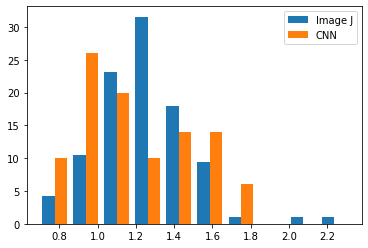

In [101]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.04210526, 0.14736842, 0.37894737, 0.69473684, 0.87368421,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.1       , 0.36      , 0.56      , 0.66      , 0.8       ,
         0.94      , 1.        , 1.        , 1.        , 1.        ]]),
 array([0.69368497, 0.85606039, 1.01843581, 1.18081123, 1.34318666,
        1.50556208, 1.6679375 , 1.83031292, 1.99268835, 2.15506377,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

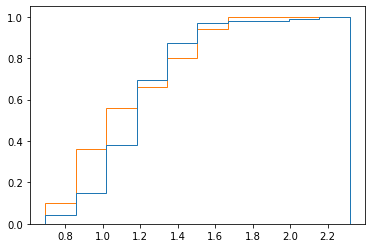

In [102]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9294523768065471


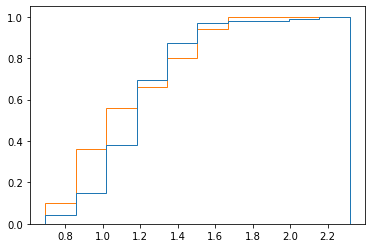

In [103]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [104]:

df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
df

,N1,N2,R^2,Details
0,200,10,0.929452,ANN without convolution


<a list of 2 Lists of Patches objects>
[0.69368497 0.85606039 1.01843581 1.18081123 1.34318666 1.50556208
 1.6679375  1.83031292 1.99268835 2.15506377 2.31743919]
[[ 4.21052632 10.52631579 23.15789474 31.57894737 17.89473684  9.47368421
   1.05263158  0.          1.05263158  1.05263158]
 [10.         26.         20.         10.         14.         14.
   6.          0.          0.          0.        ]]


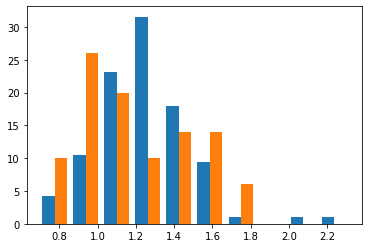

In [106]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [107]:
print(counts.sum())

200.0000000000001


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


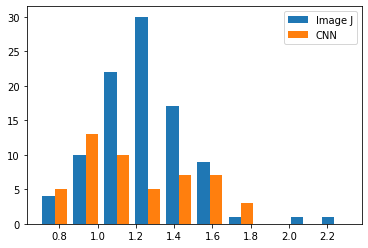

In [108]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [109]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1